In [106]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns # statistical data visualization

In [107]:
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'eval']
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', sep=',', names = names)

In [108]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [109]:
df.shape

(1728, 7)

In [110]:
df[pd.isnull(df).any(axis=1)]

,buying,maint,doors,persons,lug_boot,safety,eval


In [111]:
df['eval'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: eval, dtype: int64

In [112]:
car_counts = pd.DataFrame(df['eval'].value_counts())

In [113]:
car_counts

,eval
unacc,1210
acc,384
good,69
vgood,65


In [142]:
car_counts['Percentage'] = car_counts['eval']/car_counts.sum()[0]

In [143]:
car_counts

,eval,Percentage
unacc,1210,0.700231
acc,384,0.222222
good,69,0.039931
vgood,65,0.037616


In [144]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

([<matplotlib.patches.Wedge at 0x114b22898>,
 [Text(-0.647211,0.889448,'Uacceptalbe'),
  Text(0.41355,-1.0193,'Acceptable'),
  Text(1.02879,-0.389346,'Good'),
  Text(1.09233,-0.129688,'VeryGood')])

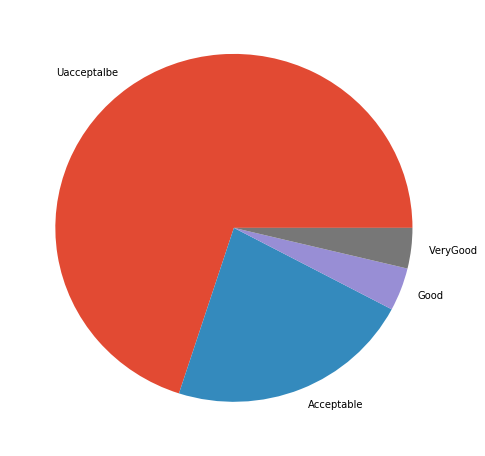

In [145]:
plt.figure(figsize=(8,8))
plt.pie(car_counts['Percentage'], labels=['Uacceptalbe', 'Acceptable', 'Good', 'VeryGood'])

In [146]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying,e.maint,e.doors,e.persons,e.lug_boot,e.safety,e.eval
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2


In [147]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [148]:
encoded_buying = le.fit(df['buying'])
encoded_buying.classes_   # Get all unique value of buy

array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [149]:
encoded_buying.transform(['high'])
encoded_buying.transform(['low'])
encoded_buying.transform(['med'])
encoded_buying.transform(['vhigh'])
encoded_buying.inverse_transform(1)

'low'

In [150]:
for i in range(4):
    print (i, ':', encoded_buying.inverse_transform(i))

0 : high
1 : low
2 : med
3 : vhigh


In [151]:
df['e.buying'] = df['buying'].map(lambda x:encoded_buying.transform([x]))
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying,e.maint,e.doors,e.persons,e.lug_boot,e.safety,e.eval
0,vhigh,vhigh,2,2,small,low,unacc,[3],3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,[3],3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,[3],3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,[3],3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,[3],3,0,0,1,2,2


In [152]:
df['e.buying'] = df['e.buying'].map(lambda x:x[0])
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying,e.maint,e.doors,e.persons,e.lug_boot,e.safety,e.eval
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2


In [153]:
encoded_maint = le.fit(df['maint'])   # fitting a column and assign it to a name

In [154]:
encoded_maint.classes_   # Chedking the classes

array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [155]:
# Creating a new column into the DataFrame and encoding the classes
df['e.maint'] = df['maint'].map(lambda x:encoded_buying.transform([x])) 

In [156]:
df['e.maint'] = df['e.maint'].map(lambda x:x[0])

In [157]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying,e.maint,e.doors,e.persons,e.lug_boot,e.safety,e.eval
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2


In [158]:
def encode_col(col_name):
    encodes = le.fit(df[col_name])
    new_col_name = 'e.'+ col_name
    df[new_col_name] = df[col_name].map(lambda x:encoded_buying.transform([x]))
    df[new_col_name] = df[new_col_name].map(lambda x:x[0])

In [159]:
encode_col('doors')
encode_col('persons')
encode_col('lug_boot')
encode_col('safety')
encode_col('eval')

In [160]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,eval,e.buying,e.maint,e.doors,e.persons,e.lug_boot,e.safety,e.eval
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2


In [161]:
pd.DataFrame(df['eval'].value_counts())

,eval
unacc,1210
acc,384
good,69
vgood,65


In [162]:
pd.DataFrame(df['e.eval'].value_counts())

,e.eval
2,1210
0,384
1,69
3,65


In [163]:
X = df[['e.buying', 'e.maint', 'e.doors','e.persons', 'e.lug_boot','e.safety']]

In [164]:
type(X)

pandas.core.frame.DataFrame

In [165]:
X.shape

(1728, 6)

In [166]:
y = df['e.eval']

In [167]:
type(y)

pandas.core.series.Series

In [168]:
y.shape

(1728,)

In [210]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state =5)

In [211]:
from sklearn import tree

In [212]:
clf_dt=tree.DecisionTreeClassifier(random_state=10)

In [213]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [214]:
y_pred_dt = clf_dt.predict(X_test)

In [215]:
type(y_pred_dt)

numpy.ndarray

In [216]:
y_pred_dt.shape

(432,)

In [217]:
y_pred_dt

array([0, 2, 0, 0, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2,
       2, 3, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 3, 2, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 3,

In [218]:
from sklearn import metrics
print( metrics.accuracy_score(y_test, y_pred_dt))

0.965277777778


In [219]:
correct_pred_dt =[]
wrong_pred_dt=[]

In [220]:
y_test2 = y_test.reset_index(drop=True)

In [221]:
y_test2 = y_test2.as_matrix()

In [222]:
for i in range(432):
    if y_test2[i] != y_pred_dt[i]:
        wrong_pred_dt.append(i)
    else:
        correct_pred_dt.append(i)

In [223]:
print( "Correct:", len(correct_pred_dt))
print( "Wrong:", len(wrong_pred_dt))


Correct: 417
Wrong: 15


In [224]:
X_test.head()

,e.buying,e.maint,e.doors,e.persons,e.lug_boot,e.safety
805,0,1,1,2,1,2
50,3,3,1,2,1,0
1171,2,2,3,1,2,2
1177,2,2,3,1,0,2
395,3,1,2,1,0,0


In [225]:
y_test[0:5]

805     0
50      2
1171    0
1177    0
395     0
Name: e.eval, dtype: int64

In [226]:
y_pred_dt[0:5]

array([0, 2, 0, 0, 0])

In [227]:
def dt_probs(index_num):
    X_param = X_test.loc[index_num]
    X_param = X_param.to_frame()
    X_param = X_param.transpose()
    temp_pred = clf_dt.predict_proba(X_param)
    temp_pred_1 = temp_pred[0]
    y_actual = y_test[index_num]
    y_range = ['Unacceptable', 'Acceptable', 'Good', 'Very_Good']
    print ('For index number: ', index_num)
    print ('Features entered: ', X_param)
    print ('Actual score: ', y_actual, '(', y_range[y_actual],')')
    print ('Predicted probailities: ')
    for i in range(4):
        print (y_range[i], " : ", temp_pred_1[i])
    

In [228]:
dt_probs(805)

For index number:  805
Features entered:       e.buying  e.maint  e.doors  e.persons  e.lug_boot  e.safety
805         0        1        1          2           1         2
Actual score:  0 ( Unacceptable )
Predicted probailities: 
Unacceptable  :  1.0
Acceptable  :  0.0
Good  :  0.0
Very_Good  :  0.0
